## Mental Health Analysis in Tech Industry

In [1]:
# Importing necessary libraries
import re
import json
import circlify
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as pyo
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')
sns.set_theme(style="darkgrid") # Set the background style to 'darkgrid' from Seaborn
import plotly.graph_objects as go
pd.set_option('display.max_columns', None) # Set the display column number

%matplotlib inline

In [2]:
# Importing the data
df_raw = pd.read_csv("..\Data\mental-heath-in-tech-2016_20161114.csv")

In [3]:
# Displaying a sample of the dataframe
df_raw.head(2)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [4]:
# Displaying the number of fields and records
print(f"The number of records is {df_raw.shape[0]} and number of fields is {df_raw.shape[1]}")

The number of records is 1433 and number of fields is 63


In [5]:
# Displaying the attributes of dataframe
df_raw.describe(include='object')

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,How willing would you be to share with friends and family that you have a mental illness?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Have your observations of how another indivi

### Displaying the questions in the Survey

In [6]:
# Extracting the questions to a list
questions_survey = list(df_raw.columns)

# Open a text file in write mode
file = open('../Survey_Questions/Questions.txt', 'w')

# Displaying all the questions in the survey
for i in range(len(questions_survey)):
    question = str(i) + ') ' + questions_survey[i]
    file.write(question+"\n")
    print(question)
file.close()

0) Are you self-employed?
1) How many employees does your company or organization have?
2) Is your employer primarily a tech company/organization?
3) Is your primary role within your company related to tech/IT?
4) Does your employer provide mental health benefits as part of healthcare coverage?
5) Do you know the options for mental health care available under your employer-provided coverage?
6) Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
7) Does your employer offer resources to learn more about mental health concerns and options for seeking help?
8) Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
9) If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
10) Do you think that discussing a mental health disorder with your employer would have negative co

In [7]:
# To standardize the column names from questions to short names
# Init a dictionary
question_standardized_mapping = {
                                'Are you self-employed?': 'Employed',
                                'How many employees does your company or organization have?': 'Employee_Number',
                                'Is your employer primarily a tech company/organization?': 'Tech_Company',
                                'Is your primary role within your company related to tech/IT?': 'Tech_Role',
                                'Does your employer provide mental health benefits as part of healthcare coverage?': 'Current_Employer_Healthcare_Coverage',
                                'Do you know the options for mental health care available under your employer-provided coverage?': 'CE_Healthcare_Awareness',
                                'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'CE_Discussed_MH',
                                'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'CE_Offered_Resources',
                                'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'CE_Anonymity_Protected',
                                'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'CE_Medical_Leave_Request',
                                'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'CE_MH_discussion_NC',
                                'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'CE_PH_discussion_NC',
                                'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'MH_discussion_coworkers',
                                'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'MH_Discussion_DirectSupervisor',
                                'Do you feel that your employer takes mental health as seriously as physical health?': 'CE_MH_Seriously_as_PH',
                                'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'CE_Observed_Negative_Consequences_Coworkers',
                                'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?': 'MH_Coverage_Private',
                                'Do you know local or online resources to seek help for a mental health disorder?': 'Local-Online_Resources',
                                'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'MH_Reveal_Clients',
                                'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'MH_Reveal_Clients_NC',
                                'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'MH_Reveal_Coworkers',
                                'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'MH_Reveal_Coworkers_NC',
                                'Do you believe your productivity is ever affected by a mental health issue?': 'Productivity_Affected_MH',
                                'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'Percentage_Productivity_Affected_MH',
                                'Do you have previous employers?': 'Previous_Emoloyer',
                                'Have your previous employers provided mental health benefits?': 'PE_Healthcare_Coverage',
                                'Were you aware of the options for mental health care provided by your previous employers?': 'PE_Awareness_EHC',
                                'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'PE_Discussed_MH',
                                'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'PE_Offered_Resources',
                                'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'PE_Anonymity_Protected',
                                'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'PE_MH_discussion_NC',
                                'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'PE_PH_discussion_NC',
                                'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'MH_Reveal_Previous_Coworkers',
                                'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'MH_Reveal_Previous_DirectSupervisor',
                                'Did you feel that your previous employers took mental health as seriously as physical health?': 'PE_MH_Seriously_as_PH',
                                'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'PE_Observed_Negative_Consequences_Coworkers',
                                'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'PH_Issue_Interview',
                                'Why or why not?': 'PH_Issue_Interview_Reason',
                                'Would you bring up a mental health issue with a potential employer in an interview?': 'MH_Issue_Interview',
                                'Why or why not?.1': 'MH_Issue_Interview_Reason',
                                'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'MH_Hurt_Career',
                                'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'MH_Negative_View_Coworker',
                                'How willing would you be to share with friends and family that you have a mental illness?': 'MH_Share_Family/Friends',
                                'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'Bad_Response_MH_CE/PE',
                                'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'CE_MH_Reveal_LessLikely',
                                'Do you have a family history of mental illness?': 'MH_Family_History',
                                'Have you had a mental health disorder in the past?': 'MH_Disorder_Past',
                                'Do you currently have a mental health disorder?': 'MH_Disorder_Present',
                                'If yes, what condition(s) have you been diagnosed with?': 'MH_Present_Diagnoses',
                                'If maybe, what condition(s) do you believe you have?': 'MH_Self_Diagnoses',
                                'Have you been diagnosed with a mental health condition by a medical professional?': 'MH_Professional_Diagnoses',
                                'If so, what condition(s) were you diagnosed with?': 'MH_Past_Diagnoses',
                                'Have you ever sought treatment for a mental health issue from a mental health professional?': 'MH_Treatment_Professional',
                                'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'Work_interference_MH_Treated',
                                'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'Work_interference_MH_NotTreated',
                                'What is your age?': 'Age',
                                'What is your gender?': 'Gender',
                                'What country do you live in?': 'Country_Of_Residence',
                                'What US state or territory do you live in?': 'US_State_Of_Residence',
                                'What country do you work in?': 'Country_Of_Work',
                                'What US state or territory do you work in?': 'US_State_Of_Work',
                                'Which of the following best describes your work position?': 'Describe_Work_Position',
                                'Do you work remotely?': 'Remote_Work'
                                }

# Mapping the standardized column names to the dataframe
df_raw.columns = df_raw.columns.to_series().map(question_standardized_mapping)

EHC - Employer Healthcare Coverage
MH - Mental Health
PH - Physical Health
NC - Negative Consequences
PE - Previous Employer
CE - Current Employer


In [8]:
# Printing a sample of the dataframe
df_raw.head()

,Employed,Employee_Number,Tech_Company,Tech_Role,Current_Employer_Healthcare_Coverage,CE_Healthcare_Awareness,CE_Discussed_MH,CE_Offered_Resources,CE_Anonymity_Protected,CE_Medical_Leave_Request,CE_MH_discussion_NC,CE_PH_discussion_NC,MH_discussion_coworkers,MH_Discussion_DirectSupervisor,CE_MH_Seriously_as_PH,CE_Observed_Negative_Consequences_Coworkers,MH_Coverage_Private,Local-Online_Resources,MH_Reveal_Clients,MH_Reveal_Clients_NC,MH_Reveal_Coworkers,MH_Reveal_Coworkers_NC,Productivity_Affected_MH,Percentage_Productivity_Affected_MH,Previous_Emoloyer,PE_Healthcare_Coverage,PE_Awareness_EHC,PE_Discussed_MH,PE_Offered_Resources,PE_Anonymity_Protected,PE_MH_discussion_NC,PE_PH_discussion_NC,MH_Reveal_Previous_Coworkers,MH_Reveal_Previous_DirectSupervisor,PE_MH_Seriously_as_PH,PE_Observed_Negative_Consequences_Coworkers,PH_Issue_Interview,PH_Issue_Interview_Reason,MH_Issue_Interview,MH_Issue_Interview_Reason,MH_Hurt_Career,MH_Negative_View_Coworker,MH_Share_Family/Friends,Bad_Response_MH_CE/PE,CE_MH_Reveal_LessLikely,MH_Family_History,MH_Disorder_Past,MH_Disorder_Present,MH_Present_Diagnoses,MH_Self_Diagnoses,MH_Professional_Diagnoses,MH_Past_Diagnoses,MH_Treatment_Professional,Work_interference_MH_Treated,Work_interference_MH_NotTreated,Age,Gender,Country_Of_Residence,US_State_Of_Residence,Country_Of_Work,US_State_Of_Work,Describe_Work_Position,Remote_Work
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,No,Maybe,No,NaN,NaN,No,NaN,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"Yes, I know several","Sometimes, if it comes up",I'm not sure,"Sometimes, if it comes up",I'm not sure,Yes,1-25%,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,NaN,No,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Sometimes,Sometimes,43,male,United Kingdom,N

### Displaying the columns with Null values more than 25%

In [9]:
# Add the column indexes with more than 500 null to the list
cols_to_drop = list(df_raw.isna().sum() >= 500)

In [10]:
# Display the names of the columns
df_raw.columns[cols_to_drop].tolist()

['Tech_Role',
 'MH_Coverage_Private',
 'Local-Online_Resources',
 'MH_Reveal_Clients',
 'MH_Reveal_Clients_NC',
 'MH_Reveal_Coworkers',
 'MH_Reveal_Coworkers_NC',
 'Productivity_Affected_MH',
 'Percentage_Productivity_Affected_MH',
 'CE_MH_Reveal_LessLikely',
 'MH_Present_Diagnoses',
 'MH_Self_Diagnoses',
 'MH_Past_Diagnoses',
 'US_State_Of_Residence',
 'US_State_Of_Work']

In [11]:
# Checking the questions with more than 25% of null values
mask_na_df_raw = df_raw.isnull().sum() > (df_raw.shape[0] * 0.25)
# Displaying the questions
list(mask_na_df_raw[mask_na_df_raw == True].index)

['Tech_Role',
 'CE_Healthcare_Awareness',
 'MH_Coverage_Private',
 'Local-Online_Resources',
 'MH_Reveal_Clients',
 'MH_Reveal_Clients_NC',
 'MH_Reveal_Coworkers',
 'MH_Reveal_Coworkers_NC',
 'Productivity_Affected_MH',
 'Percentage_Productivity_Affected_MH',
 'CE_MH_Reveal_LessLikely',
 'MH_Present_Diagnoses',
 'MH_Self_Diagnoses',
 'MH_Past_Diagnoses',
 'US_State_Of_Residence',
 'US_State_Of_Work']

### Technology Company

In [12]:
# Init of the dict for tech
boolean_to_categorical = {1.0 : 'Yes', 0.0 : 'No'}
# To map the boolean in the tech_company column
df_raw['Tech_Company'].replace(boolean_to_categorical, inplace=True)

### Mental Health Professional treatment

In [13]:
# To map the boolean in the professional treatment column
df_raw['MH_Treatment_Professional'].replace(boolean_to_categorical, inplace=True)

### Gender standardization

In [14]:
# Displaying all values of Gender column
df_raw.Gender.unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [15]:
# Creating a dict to standardize the gender column values
# Init of dict for male
gender_male = ['male', 'male ', 'm', 'man', 'cis male', 'male.', 'male 9:1 female, roughly', 'male (cis)', 'sex is male', 'malr', 'dude', 'mail', 'm|', 'cisdude', 'cis man',
               "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take? "]
dict_male = dict.fromkeys(gender_male, 'Male')

# Init of dict for female
gender_female = ['female', 'i identify as female.', 'female assigned at birth ', 'f', 'woman', 'fm', 'female ', 'female or multi-gender femme', 'female/woman', 'cisgender female', 'fem', 'female (props for making this a freeform field, though)',
                 ' female', 'cis-woman', 'afab']
dict_female = dict.fromkeys(gender_female, 'Female')

# Init of dict for unknown
gender_unknown = ['other', 'human', 'unicorn', 'none of your business', 'Unknown']
dict_unknown = dict.fromkeys(gender_unknown, 'Unknown')

# Created key value pairs in a dict for the values in Gender column
dict_gender = {**dict_male, **dict_female, **dict_unknown}

# Converting the values in gender to lower case
df_raw['Gender'] = df_raw['Gender'].str.lower()
# Filled the missing values with unknown
df_raw['Gender'].fillna(value='Unknown', inplace=True)

# to replace the gender value with standardized values
df_raw['Gender'].replace(dict_gender, inplace=True)

# to replace all the remaining values with 'LGBTQ+'
df_raw.loc[df_raw[~df_raw.Gender.isin(['Male', 'Female', 'Unknown'])].index, 'Gender'] = 'LGBTQ+'

In [16]:
# Displaying standardized values in Gender column
df_raw['Gender'].value_counts()

Gender
Male       1058
Female      339
LGBTQ+       28
Unknown       8
Name: count, dtype: int64

### Age

In [17]:
# To check the values in gender column
df_raw['Age'].unique()

array([ 39,  29,  38,  43,  42,  30,  37,  44,  28,  34,  35,  52,  32,
        25,  31,  26,  33,  27,  36,  40,  46,  41,  45,  19,  21,  24,
        17,  23,  22,  51,  48,  55,  50,  49,  20,  54,  47,  56,  57,
        63,  99,  61, 323,  62,  53,  58,   3,  66,  59,  15,  65,  74,
        70], dtype=int64)

In [18]:
# To sort the values in the range of age
age_replace = df_raw['Age'].unique()
age_replace = age_replace[(age_replace<18) | (age_replace > 75)].tolist()
# Replacing the outliers in the age column with the median value
age_median = df_raw.loc[(df_raw['Age'] >= 18) & (df_raw['Age'] <= 75)]['Age'].median()
df_raw['Age'].replace(age_replace, age_median, inplace=True)

### Work position

In [19]:
# Setting the others value to Unknown
df_raw['Describe_Work_Position'].replace(to_replace='Other', value='Unknown', inplace=True)

# Replacing the others word in the column with nothing
Work_Position_Other_Pattern = r'\|?Other\|?'
Work_Position_Other_replacement = ''
df_raw['Describe_Work_Position'] = df_raw['Describe_Work_Position'].str.replace(Work_Position_Other_Pattern, Work_Position_Other_replacement, regex=True)

# Define a function to modify the values
def modify_string(text):
    if re.search('Front-end Developer', text) and re.search('Back-end Developer', text):
        return 'Full-stack Developer|' + text
    else:
        return text
# Applying the modify string function to the dataframe column
df_raw['Describe_Work_Position'] = df_raw['Describe_Work_Position'].apply(modify_string)

# Splitting the values on the | and retaining the first value
df_raw['Describe_Work_Position'] = df_raw['Describe_Work_Position'].str.split('|').str[0]

In [20]:
# Displaying the Work position values
df_raw['Describe_Work_Position'].value_counts()

Describe_Work_Position
Full-stack Developer       318
Back-end Developer         309
Front-end Developer        154
Supervisor/Team Lead       143
Unknown                    112
DevOps/SysAdmin             96
One-person shop             86
Executive Leadership        64
Support                     54
Dev Evangelist/Advocate     48
Designer                    36
HR                           8
Sales                        5
Name: count, dtype: int64

### Countries

In [21]:
# Creating a dict to standardize the gender column values
# Init of dict for others
country_others = ['Czech Republic', 'Lithuania', 'Australia', 'France', 'Venezuela', 'Poland', 'Belgium', 'Brazil', 'Denmark',
       'Sweden', 'Russia', 'Spain', 'India', 'Mexico', 'Switzerland', 'Norway', 'Argentina', 'Ireland', 'Italy', 'Finland', 'Colombia',
       'Costa Rica', 'Vietnam', 'Bulgaria', 'New Zealand', 'South Africa', 'Slovakia', 'Austria', 'Bangladesh', 'Algeria', 'Pakistan',
       'Afghanistan', 'Greece', 'Romania', 'Other', 'Brunei', 'Japan', 'Iran', 'Hungary', 'Israel', 'Ecuador', 'Bosnia and Herzegovina',
       'China', 'Chile', 'Guatemala', 'Taiwan', 'Serbia', 'Estonia', 'United Arab Emirates', 'Turkey']
dict_other_country = dict.fromkeys(country_others, 'Others')

# Created key value pairs in a dict for the values in Country column
dict_country = {'United States of America': 'USA', 'United Kingdom' : 'UK'}
# To join the dict with the country values
dict_country.update(dict_other_country)

# Mapping the standardized country names to the dataframe
df_raw['Country_Of_Residence'].replace(dict_country, inplace=True)

In [22]:
# Displaying the country values
df_raw['Country_Of_Residence'].value_counts()

Country_Of_Residence
USA            840
Others         229
UK             180
Canada          78
Germany         58
Netherlands     48
Name: count, dtype: int64

### Share Mental Health illness

In [23]:
df_raw['MH_discussion_coworkers'].fillna(value='Not Answered', inplace=True)
df_raw['MH_Discussion_DirectSupervisor'].fillna(value='Not Answered', inplace=True)
df_raw['MH_Share_Family/Friends'].replace(to_replace='Not applicable to me (I do not have a mental illness)', value='Not applicable', inplace=True)

### Mental Health Diagnoses
#### Present Diagnoses

In [24]:
# To standardize the value of 'I dont know' to 'Maybe' across the dataframe
df_raw['MH_Family_History'].replace(to_replace="I don't know", value='Maybe', inplace=True)

In [25]:
# Filling the missing values in the "MH_Present_Diagnoses" with the values in "MH_Self_Diagnoses" as they are conditionally filled
df_raw.loc[df_raw['MH_Disorder_Present'] == 'Maybe', 'MH_Present_Diagnoses'] = df_raw.loc[df_raw['MH_Disorder_Present'] == 'Maybe', 'MH_Present_Diagnoses'].fillna(df_raw['MH_Self_Diagnoses'])

# Filling the missing values of MH_Past_Diagnoses based on MH_Professional_Diagnoses column Yes condition
df_raw.loc[df_raw['MH_Present_Diagnoses'] == 'Yes', 'MH_Present_Diagnoses'] = df_raw.loc[df_raw['MH_Disorder_Present'] == 'Yes', 'MH_Present_Diagnoses'].fillna('Mental Health Diagnosed but Issue not listed')

# Filling the missing values of MH_Past_Diagnoses column
df_raw['MH_Present_Diagnoses'].fillna('No Diagnoses', inplace=True)

#### Past Diagnoses

In [26]:
# Filling the missing values of MH_Past_Diagnoses based on MH_Professional_Diagnoses column Yes condition
df_raw.loc[df_raw['MH_Professional_Diagnoses'] == 'Yes', 'MH_Past_Diagnoses'] = df_raw.loc[df_raw['MH_Professional_Diagnoses'] == 'Yes', 'MH_Past_Diagnoses'].fillna('Mental Health Diagnosed but Issue not listed')

# Filling the missing values of MH_Past_Diagnoses column
df_raw['MH_Past_Diagnoses'].fillna('No Diagnoses', inplace=True)

In [27]:
# Init a set/list for all the diagnoses in the dataframe
diagnoses_list = set()
#diagnoses_list.append(df_raw['MH_Past_Diagnoses'].str.split('|')[1])

# Init of a for loop
# Itterating over all the rows to split the values row by row of the dataframe
for index, row in df_raw.iterrows():
    values_1 = row['MH_Past_Diagnoses'].split('|')    
    values_2 = row['MH_Present_Diagnoses'].split('|')
    values_3 = str(row['MH_Self_Diagnoses']).split('|')
    diagnoses_list.update(values_1,values_2) # Adding the splitted values to the set

In [28]:
# Create a mapping dictionary for standardized diagnoses
diagnosis_mapping_standardization = {
    'Substance Use Disorder': 'Substance Use Disorder',
    'Autism - while not a "mental illness", still greatly affects how I handle anxiety': 'Autism',
    'Mental Health Diagnosed but Issue not listed': 'Mental Health Diagnosed but Issue not listed',
    'No Diagnoses': 'No Diagnoses',
    'Dissociative Disorder': 'Dissociative Disorder',
    'Attention Deficit Disorder': 'Attention Deficit Disorder',
    'Addictive Disorder': 'Addictive Disorder',
    'ADD (w/o Hyperactivity)': 'Attention Deficit Disorder',
    'attention deficit disorder (but not the hyperactive version)': 'Attention Deficit Disorder',
    'Asperges': 'Autism',
    'Autism (Asperger\'s)': 'Autism',
    'Autism': 'Autism',
    'Combination of physical impairment (strongly near-sighted) with a possibly mental one (MCD / "ADHD", though its actually a stimulus filtering impairment)': 'Attention Deficit Disorder',
    "I haven't been formally diagnosed, so I felt uncomfortable answering, but Social Anxiety and Depression.": 'Anxiety Disorder',
    'PDD-NOS (see above)': 'Autism',
    'PTSD (undiagnosed)': 'Post-traumatic Stress Disorder',
    'Obsessive-Compulsive Disorder': 'Obsessive-Compulsive Disorder',
    'Eating Disorder (Anorexia, Bulimia, etc)': 'Eating Disorder',
    'Depression': 'Depression',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)': 'Psychotic Disorder',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety Disorder',
    'post-partum / anxiety': 'Anxiety Disorder',
    "We're all hurt, right?!": 'Mental Health Diagnosed but Issue not listed',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)': 'Personality Disorder',
    'Attention Deficit Hyperactivity Disorder': 'Attention Deficit Hyperactivity Disorder',
    'Pervasive Developmental Disorder (Not Otherwise Specified)': 'Autism',
    'Autism Spectrum Disorder': 'Autism',
    'Gender Identity Disorder': 'Gender Dysphoria',
    'Intimate Disorder': 'Intimate Disorder',
    'Depersonalisation': 'Depersonalisation',
    'depersonalization disorder': 'Depersonalisation',
    'PDD-NOS': 'Autism',
    'Schizotypal Personality Disorder': 'Personality Disorder',
    'MCD (when it was diagnosed, the ultra-mega "disorder" ADHD didn\'t exist yet)': 'Attention Deficit Disorder',
    'autism spectrum disorder': 'Autism',
    'Autism spectrum disorder': 'Autism',
    'posttraumatic stress disourder': 'Post-traumatic Stress Disorder',
    "Autism (Asperger's)": 'Autism',
    "Asperger's": 'Autism',
    'Asperger Syndrome': 'Autism',
    'Tinnitus': 'Tinnitus',
    'Sexual addiction': 'Sexual addiction',
    'Sleeping Disorder': 'Sleeping Disorder',
    'Seasonal Affective Disorder': 'Seasonal Affective Disorder',
    'Stress Response Syndromes': 'Stress Response Syndromes',
    'Post-traumatic Stress Disorder': 'Post-traumatic Stress Disorder',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorder',
    'Gender Dysphoria': 'Gender Dysphoria',
    'Aspergers': 'Autism',
    'Suicidal Ideation': 'Suicidal Ideation',
    'Burn out': 'Burnout',
    'Burnout': 'Burnout',
    'Transgender': 'Transgender',
    'Traumatic Brain Injury': 'Traumatic Brain Injury'
}

# Init of a function for splitting and replacing the values of diagnoses to their standard values
def cleaning_diagnoses(row):
    # Split the string by '|' and replace values using list comprehension
    replaced_values = [diagnosis_mapping_standardization.get(x) for x in row.split('|')]
    # Join and Return the replaced values back into a string with '|' as a separator
    return('|'.join(replaced_values))
    #print(replaced_values)
    
# Use the apply method and diagnosis_mapping_standardization to standardize the diagnoses
df_raw['MH_Past_Diagnoses'] = df_raw['MH_Past_Diagnoses'].apply(cleaning_diagnoses)

# Use the apply method and diagnosis_mapping_standardization to standardize the diagnoses
df_raw['MH_Present_Diagnoses'] = df_raw['MH_Present_Diagnoses'].apply(cleaning_diagnoses)

In [29]:
# Init a list for clean value of the diagnoses in the dataframe
diagnoses_clean_list = set()

# Init of a for loop
# Itterating over all the rows to split the values row by row of the dataframe
for index, row in df_raw.iterrows():
    values_1 = row['MH_Past_Diagnoses'].split('|')
    values_2 = row['MH_Present_Diagnoses'].split('|')
    #values_3 = str(row['MH_Self_Diagnoses']).split('|')
    diagnoses_clean_list.update(values_1,values_2) # Adding the splitted values to the set
# Convert the set to a dictionary
diagnoses_clean_list = dict(zip(diagnoses_clean_list, range(len(diagnoses_clean_list))))

# Init of a function for splitting and replacing the values of diagnoses to their standard values
def cleaning_diagnoses_numeric(row):
    # Split the string by '|' and replace values using list comprehension
    replaced_values = [str(diagnoses_clean_list.get(x)) for x in row.split('|')]
    # Join and Return the replaced values back into a string with '|' as a separator
    return('.'.join(replaced_values))

# Use the apply method and diagnosis_mapping to standardize the diagnoses
df_raw['MH_Past_Diagnoses_ID'] = df_raw['MH_Past_Diagnoses'].apply(cleaning_diagnoses_numeric)
# Use the apply method and diagnosis_mapping to standardize the diagnoses
df_raw['MH_Present_Diagnoses_ID'] = df_raw['MH_Present_Diagnoses'].apply(cleaning_diagnoses_numeric)

# To drop the mapped column 
#df_raw.drop(columns=['MH_Past_Diagnoses', 'MH_Present_Diagnoses', 'MH_Self_Diagnoses'], inplace=True)

In [30]:
# Convert the dict to dataframe
diagnoses_clean_list = pd.DataFrame(diagnoses_clean_list.items(), columns=['MH_Past_Diagnoses', 'Id'])
# To rearrange the columns
diagnoses_clean_list = diagnoses_clean_list.iloc[:,[1,0]]
# Concatenate all values in the column into a single string
all_values = ".".join(df_raw['MH_Present_Diagnoses_ID'])
# To count the occurrences of the disorders in the present coumn and to to map the counts to the clean diagnoses list
diagnoses_clean_list['Count'] = diagnoses_clean_list['Id'].astype(str).map(pd.Series(all_values.split(".")).value_counts().to_dict())
# Displaying the sample of dataframe with ID, Diagnoses
diagnoses_clean_list.head()

,Id,MH_Past_Diagnoses,Count
0,0,Mood Disorder,631
1,1,Attention Deficit Disorder,2
2,2,Sexual addiction,1
3,3,Attention Deficit Hyperactivity Disorder,179
4,4,Anxiety Disorder,539


# To drop the mapped column 
df_raw.drop(columns=['MH_Past_Diagnoses', 'MH_Present_Diagnoses', 'MH_Self_Diagnoses'], inplace=True)

### User Defined Function

In [31]:
# Init of a function
# To calculate the percentage and return it in a list
def percentage_calc(variable_counts):
    return([round((variable_counts[x] / sum(variable_counts)) * 100, 2) for x in range(len(variable_counts))])

In [32]:
# Init of a function
# To create a label and return it in a list
def label_donuts(variable_label, variable_counts, variable_percentage):
    return([f"{value}\n{count} ({percentage:.1f}%)" for value, count, percentage in zip(variable_label, variable_counts, variable_percentage)])

In [33]:
# Init of a function
# To create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

## Data Visualization

### Number of employees by Company Size

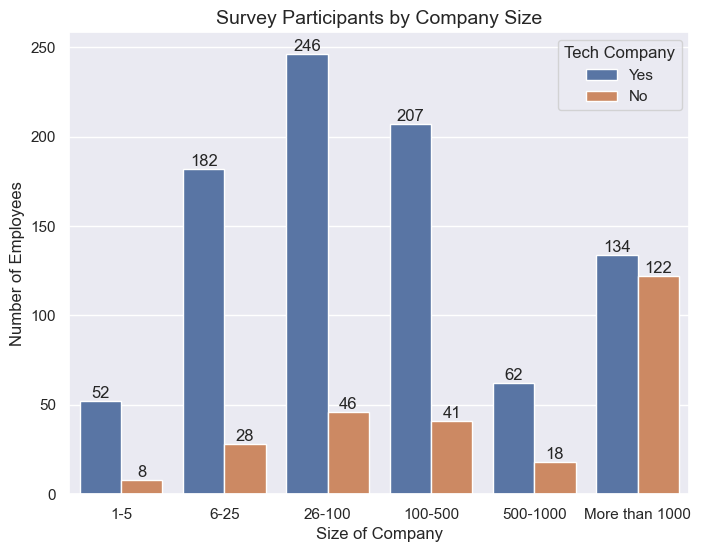

In [34]:
# Create a dataframe with necessary column
df_employee_category = df_raw[['Employee_Number', 'Tech_Company', 'Country_Of_Residence', 'Remote_Work', 'Gender']].copy()
# To drop the null values
df_employee_category.dropna(inplace=True)

# Setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a barchart
ax = sns.countplot(data=df_employee_category,
                 x="Employee_Number", hue = "Tech_Company",
                 order=['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'])
# Add labels to the individual bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Adding title, x-axis, y-axis, legend
ax.set_title("Survey Participants by Company Size", fontsize=14)
ax.set_xlabel("Size of Company")
ax.set_ylabel("Number of Employees")
ax.legend(title='Tech Company')

# Save the visual as a .jpeg
plt.savefig("../Visualizations/BarChart_CompanySize.jpeg", bbox_inches="tight")

plt.show()

### Number of people by country

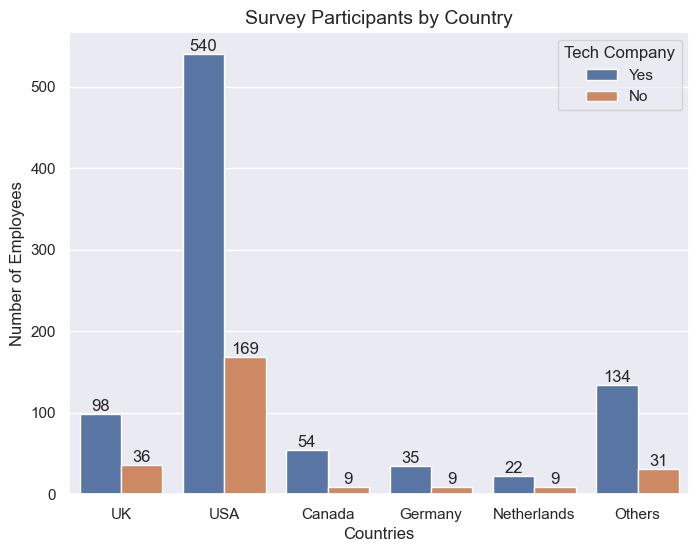

In [35]:
# Setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a barchart
ax = sns.countplot(data=df_employee_category,
                 x="Country_Of_Residence", hue = "Tech_Company")
# Add labels to the individual bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# Adding title, x-axis, y-axis, legend
ax.set_title("Survey Participants by Country", fontsize=14)
ax.set_xlabel("Countries")
ax.set_ylabel("Number of Employees")
ax.legend(title='Tech Company')

# Save the visual as a .jpeg
plt.savefig("../Visualizations/BarChart_Country.jpeg", bbox_inches="tight")

plt.show()

### Mental Health Illness by Remote Work Preference

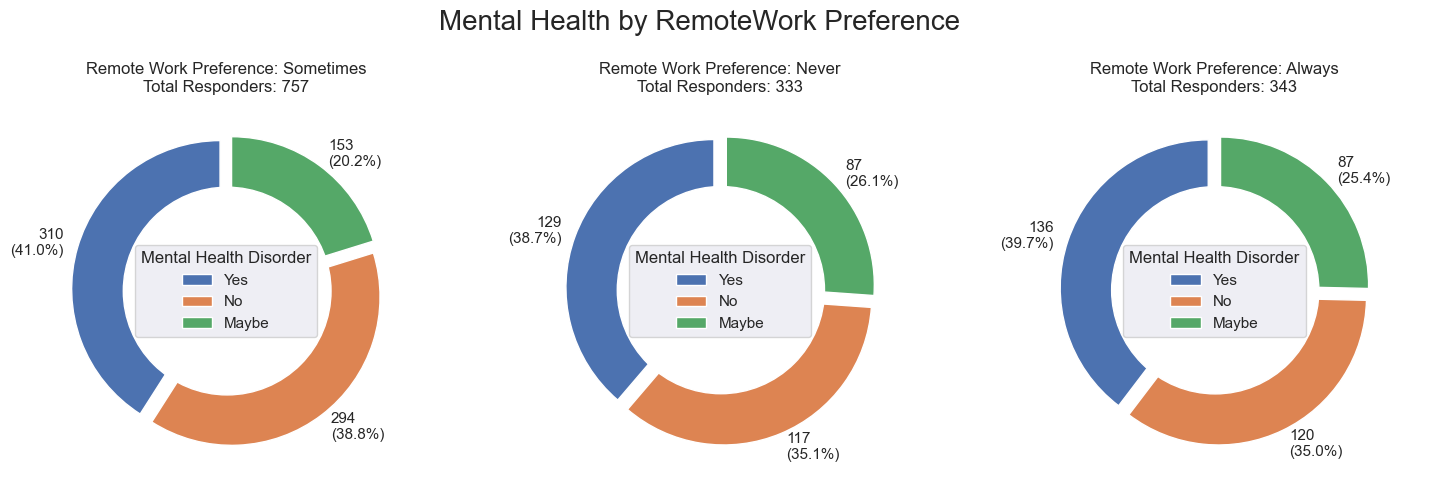

In [36]:
# Set the background style to 'darkgrid' from Seaborn
sns.set_style("darkgrid")

# Define unique remote work preferences
remote_work_preferences = df_employee_category['Remote_Work'].unique()

# Create a subplot for each remote work preference
fig, axes = plt.subplots(1, len(remote_work_preferences), figsize=(15, 5))
plt.suptitle('Mental Health by RemoteWork Preference', fontsize=20)

for i, preference in enumerate(remote_work_preferences):
    ax = axes[i]
    ax.axis('equal')
    
    # Filter the DataFrame for the current remote work preference
    filtered_df = df_raw[df_raw['Remote_Work'] == preference]
    
    # Count the occurrences of mental health conditions
    mh_counts = filtered_df['MH_Disorder_Present'].value_counts()
    
    # Calculate percentages
    total = mh_counts.sum()
    percentages = mh_counts / total * 100
    
    # Create labels with both count and percentage
    labels = [f"{count}\n({percentage:.1f}%)" for count, percentage in zip(mh_counts, percentages)]
    
    # Plot the donut chart with labels
    wedges, text, autotext = ax.pie(
        mh_counts,
        labels=labels,  # Display both count and percentage
        autopct='',  # Remove default percentage display
        explode=[0.05, 0.05, 0.05],
        startangle=90,
        pctdistance=0.85,
        wedgeprops=dict(width=0.4, edgecolor='w')
    )

    # Draw a circle in the center to make it a donut chart
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(center_circle)

    title = ("Remote Work Preference: " + preference + '\n' + 'Total Responders: ' + str(total))

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax.set_title(title)

    # Add a legend for mental health values
    ax.legend(mh_counts.index, loc="center", title="Mental Health Disorder")


plt.tight_layout()

# Save the visual as a .jpeg
plt.savefig("../Visualizations/DonutChart_RemoteWork.jpeg")

plt.show()


### Gender Distribution

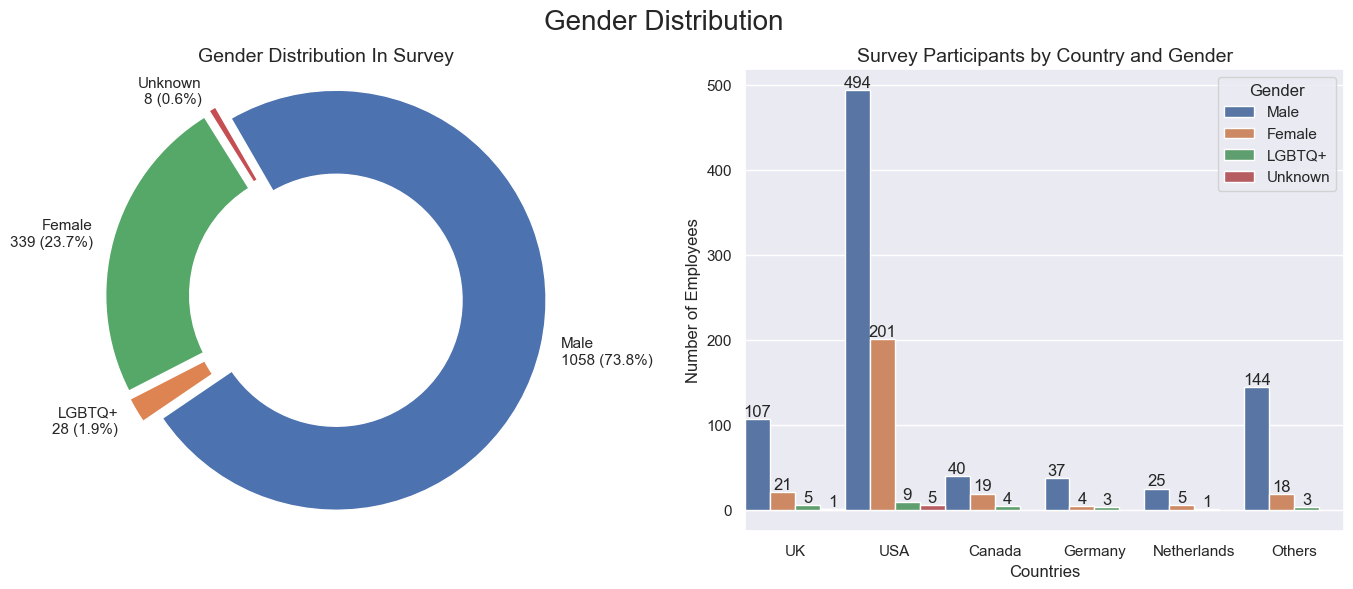

In [37]:
# Setting lists for labels, count, percentage
gender_labels = ['Male', 'LGBTQ+', 'Female', 'Unknown']
gender_counts = [1058, 28, 339, 8]
gender_percentage = [round((gender_counts[x] / sum(gender_counts)) * 100, 2) for x in range(len(gender_counts))]

# Create a subplot grid with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(17, 6), facecolor='white')
plt.suptitle('Gender Distribution', fontsize=20)

# Create labels with both count and percentage
labels = [f"{value}\n{count} ({percentage:.1f}%)" for value, count, percentage in zip(gender_labels, gender_counts, gender_percentage)]

# First subplot (circle plot)
ax1 = axs[0]
ax1.pie(gender_counts, labels=labels, autopct='', explode=[0.05, 0.05, 0.05, 0.05], startangle=120, 
        pctdistance=0.85, counterclock=False, wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Add a title
ax1.set_title('Gender Distribution In Survey', fontsize=14)

# Second subplot (bar plot)
ax2 = axs[1]
sns.countplot(data=df_employee_category, x='Country_Of_Residence', hue='Gender', ax=ax2, width=1)
# Add labels to the individual bars
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1])
ax2.bar_label(ax2.containers[2])
ax2.bar_label(ax2.containers[3])

# Adding title, x-axis, y-axis, legend
ax2.set_title("Survey Participants by Country and Gender", fontsize=14)
ax2.set_xlabel("Countries")
ax2.set_ylabel("Number of Employees")
ax2.legend(title='Gender')

# Save the visual as a .jpeg
plt.savefig("../Visualizations/PieBarChart_Gender.jpeg")

plt.show()

### Mental Health History

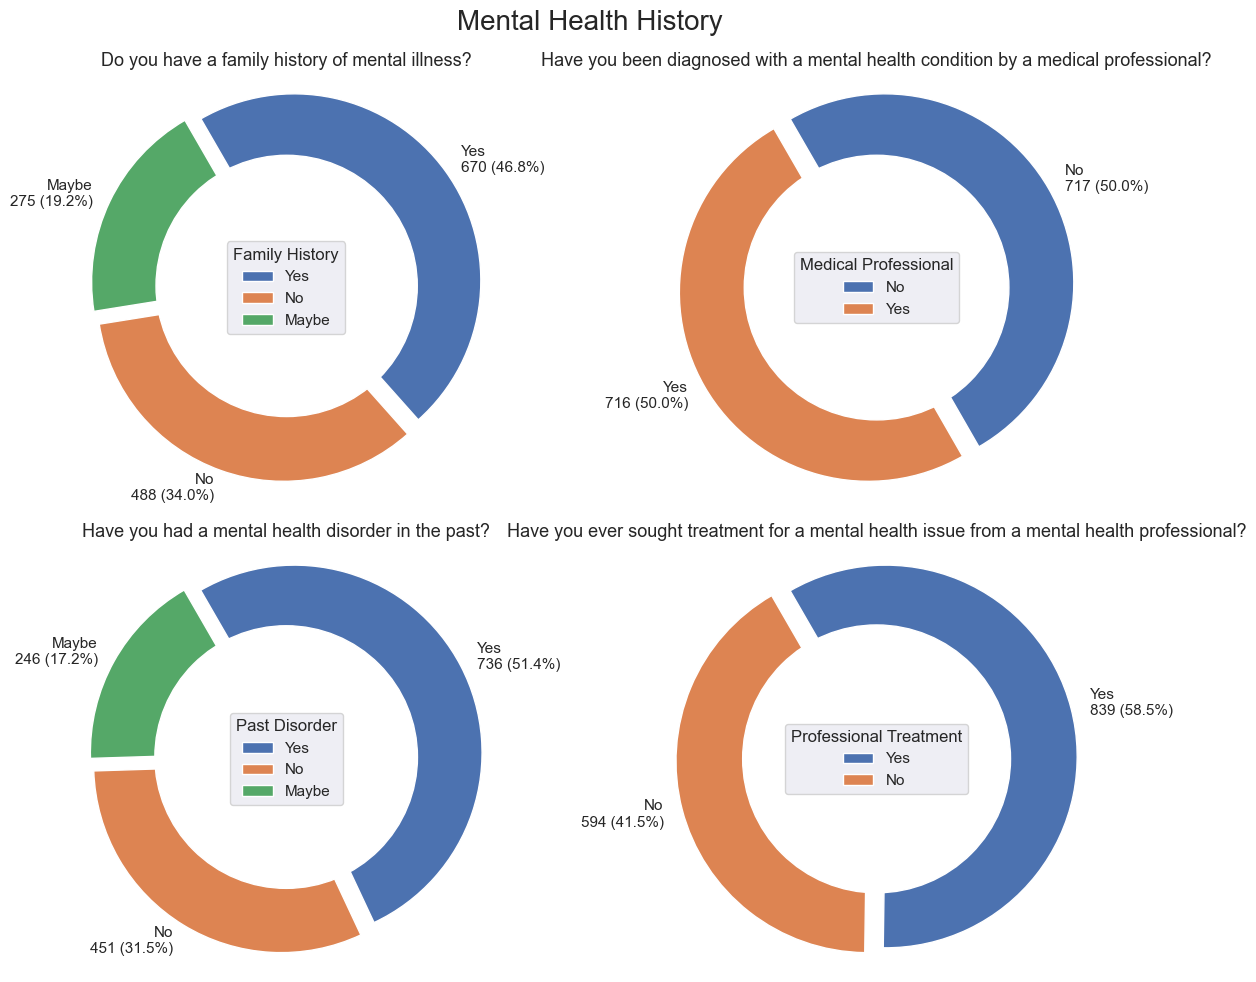

In [38]:
# Create a dataframe for history of mental illness
df_MH_history = df_raw[['MH_Family_History', 'MH_Professional_Diagnoses', 'MH_Disorder_Past', 'MH_Treatment_Professional']].copy()

# Create a subplot grid with 2 row and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10), facecolor='white')
plt.suptitle('Mental Health History', fontsize=20)

# Legend title list
legend_MH_history = ['Family History', 'Medical Professional', 'Past Disorder', 'Professional Treatment']

# Init of a For loop
# to plot the graph in each plot of the subplot
for i, column in enumerate(df_MH_history.columns):
    ax=axs[i // 2, i % 2]

    # labels and count of their occurrences
    plot_labels = df_MH_history[column].value_counts().index.tolist()
    plot_counts = df_MH_history[column].value_counts().tolist()

    # Calculate percentages
    plot_percentage = percentage_calc(plot_counts)

    # Create labels with both count and percentage
    plot_donut_labels = label_donuts(plot_labels,plot_counts,plot_percentage)

    # Calculate the 'explode' values as float
    explode_values = [0.05] * len(plot_labels)

    # Plot a pie chart
    ax.pie(plot_counts, labels=plot_donut_labels,
            autopct='', explode=explode_values,
            startangle=120, pctdistance=0.85, counterclock=False,
            wedgeprops=dict(width=0.4, edgecolor='w'))
    
    # Draw a circle in the center to make it a donut chart
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(center_circle)

    # extracting question from the dict using the column names
    title = list(filter(lambda x: question_standardized_mapping[x] == df_MH_history.columns[i], question_standardized_mapping))[0]

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')  
    # Title for the plot in the subplots
    ax.set_title(title, fontsize = 13)

    # Add a legend for mental health values
    ax.legend(plot_labels, loc="center", title=legend_MH_history[i])

plt.tight_layout()

# Save the visual as a .jpeg
plt.savefig("../Visualizations/DonutChart_MentalHealth_History.jpeg", bbox_inches="tight")

plt.show()

### Frequency of Mental Health Disorders

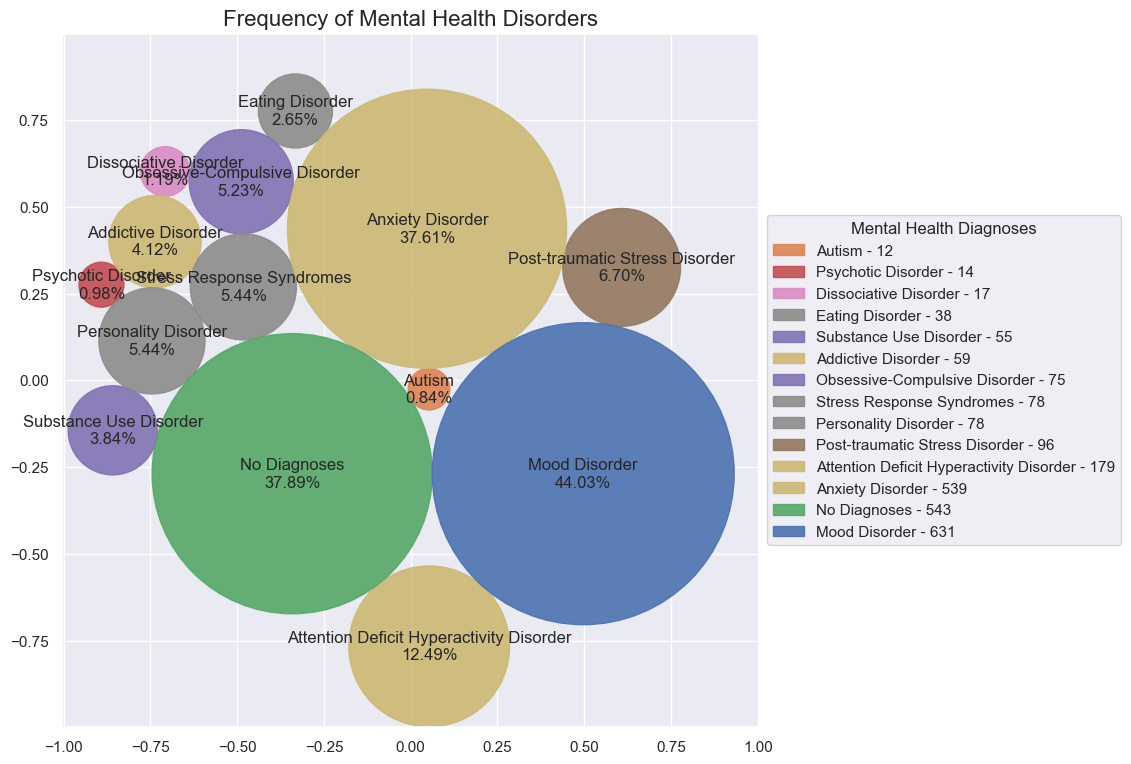

In [39]:
# Filter rows where Count is greater than 10
filtered_df = diagnoses_clean_list[diagnoses_clean_list['Count'] >= 10]
filtered_df.sort_values(by='Count', inplace=True, ascending=False)

# Compute circle positions
circles = circlify.circlify(filtered_df['Count'].tolist(), show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0))

# Get the maximum count for color scaling
n = filtered_df['Count'].max()

# Setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(9, 9), facecolor='white')
ax.axis('equal')

# Setting the limits fo the x and y axes
lim = max(max(abs(circle.x) + circle.r, abs(circle.y) + circle.r) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# List of labels and counts
labels = list(filtered_df['MH_Past_Diagnoses'])
counts = list(filtered_df['Count'])

# Create a Seaborn color palette
color_palette = sns.color_palette("deep", n)

# Reverse the order to match circlify ordering
labels.reverse()
counts.reverse()

# Print circles with labels and percentages
legend_handles = []
for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    color = color_palette[count - 1]  # Scale color based on count
    bubble = plt.Circle((x, y), r, alpha=0.9, color=color, label=f'{label} - {count}')
    ax.add_patch(bubble)
    percentage = f'{count / 1433 * 100:.2f}%'
    ax.annotate(f'{label}\n{percentage}', (x, y), size=12, va='center', ha='center')
    legend_handles.append(bubble)

# Add a legend
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Mental Health Diagnoses')

# Add a title
ax.set_title('Frequency of Mental Health Disorders', fontsize=16)

# Save the visual as a .jpeg
plt.savefig("../Visualizations/BubbleChart_MentalHealth_Disorder.jpeg", bbox_inches="tight")

plt.show()

### Willingness to Share Mental Health

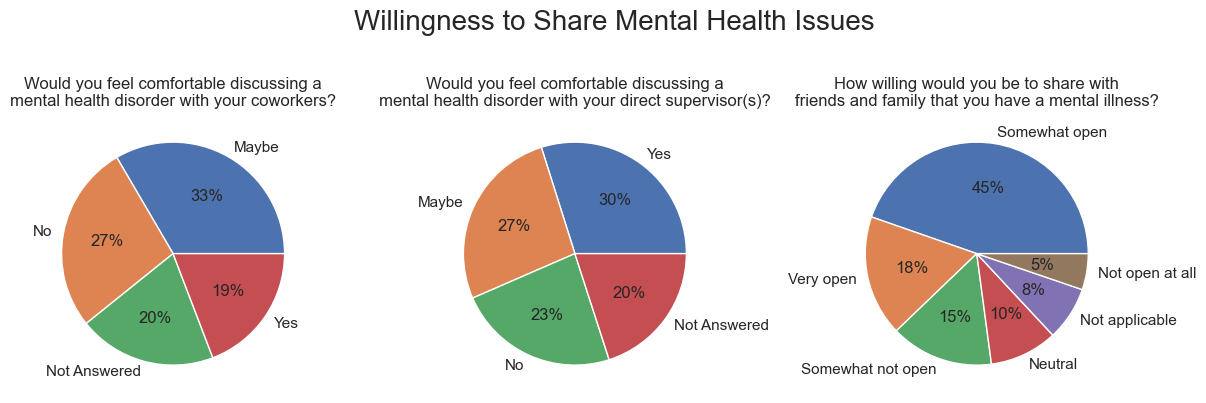

In [40]:
# Create a dataframe for sharing of mental health
df_share_MH = df_raw[['MH_discussion_coworkers', 'MH_Discussion_DirectSupervisor', 'MH_Share_Family/Friends']]

# Set the background style to 'darkgrid' from Seaborn
sns.set_style("darkgrid")

# Create a subplot for each remote work preference
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
plt.suptitle('Willingness to Share Mental Health Issues', fontsize=20, y=0.87)

for i in range(3):
    ax = axes[i]

    keys = df_share_MH[df_share_MH.columns[i]].value_counts().index.tolist()
    values = df_share_MH[df_share_MH.columns[i]].value_counts().tolist()

    # Define Seaborn color palette to use 
    palette_color = sns.color_palette('deep')

    # Plotting the pie chart
    ax.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%')

    # Setting the grid
    ax.grid(True)

    # Extracting question from the dict using the column names
    title = list(filter(lambda x: question_standardized_mapping[x] == df_share_MH.columns[i], question_standardized_mapping))[0]

    # Add a new line character in the middle of the string
    new_title = ' '.join(title.split()[:len(title.split()) // 2]) + '\n' + ' '.join(title.split()[len(title.split()) // 2:])

    # Add a title
    ax.set_title(new_title, fontsize=12)  # Adjust y position

plt.tight_layout()

# Save the visual as a .jpeg
plt.savefig("../Visualizations/PieChart_MentalHealth_Share.jpeg", bbox_inches="tight")

plt.show()

### 

### Employee Perspective

df_employee_perspective = df_raw[['CE_MH_discussion_NC', 'CE_PH_discussion_NC']].copy()
df_employee_perspective.fillna('Not Answered', inplace=True)

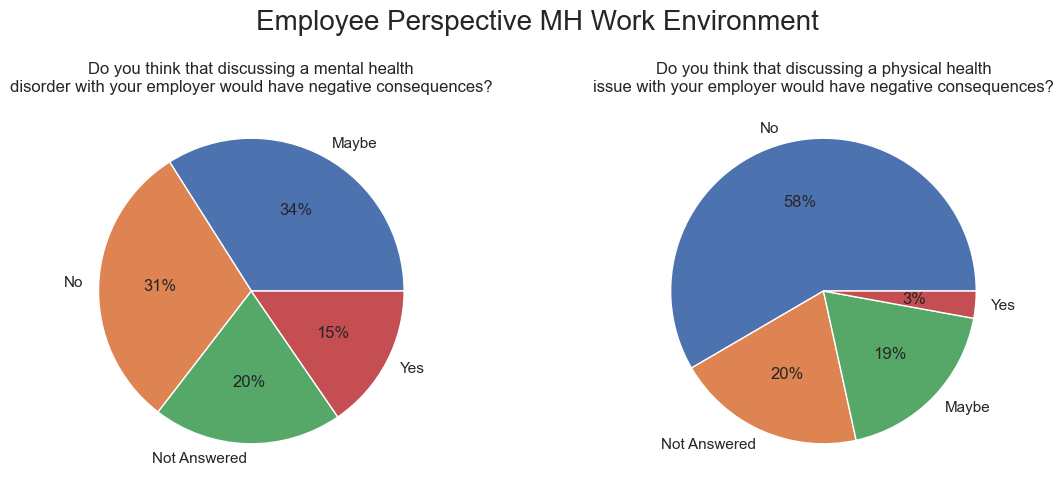

In [41]:
# Create dataframe for employee perspective
df_employee_perspective = df_raw[['CE_MH_discussion_NC', 'CE_PH_discussion_NC']].copy()
# To fill the null values
df_employee_perspective.fillna('Not Answered', inplace=True)

# Create a subplot for each remote work preference
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle('Employee Perspective MH Work Environment', fontsize=20)

for i in range(2):
    ax = axes[i]

    keys = df_employee_perspective[df_employee_perspective.columns[i]].value_counts().index.tolist()
    values = df_employee_perspective[df_employee_perspective.columns[i]].value_counts().tolist()

    # Define Seaborn color palette to use 
    palette_color = sns.color_palette('deep')

    # Plotting the pie chart
    ax.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%')

    # Setting the grid
    ax.grid(True)

    # Extracting question from the dict using the column names
    title = list(filter(lambda x: question_standardized_mapping[x] == df_employee_perspective.columns[i], question_standardized_mapping))[0]

    # Add a new line character in the middle of the string
    new_title = ' '.join(title.split()[:len(title.split()) // 2]) + '\n' + ' '.join(title.split()[len(title.split()) // 2:])

    # Add a title
    ax.set_title(new_title, fontsize=12)  # Adjust y position

plt.tight_layout()

# Save the visual as a .jpeg
plt.savefig("../Visualizations/PieChart_Work_Perspective.jpeg", bbox_inches="tight")

plt.show()

### Current Employer MH Awareness

df_employeer_create_safe = df_raw[['CE_Healthcare_Awareness', 'CE_Discussed_MH', 'CE_Offered_Resources', 'CE_Medical_Leave_Request']].copy()
df_employeer_create_safe['CE_Medical_Leave_Request'].fillna('Not Answered', inplace=True)

In [42]:
# Create a dataframe for mental health awareness
df_employeer_create_safe = df_raw[['CE_Healthcare_Awareness', 'CE_Discussed_MH', 'CE_Offered_Resources', 'CE_Medical_Leave_Request']].copy()
# To fill the null values
df_employeer_create_safe['CE_Medical_Leave_Request'].fillna('Not Answered', inplace=True)

answer_type = ['Yes', 'No', 'Maybe', 'Not Answered']
radar_plot_count_1 = [307, 354, 352, 420]
radar_plot_count_2 = [230, 813, 103, 287]
radar_plot_count_3 = [295, 531, 320, 287]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=radar_plot_count_1, theta=answer_type, fill='toself', name='CE_Healthcare_Awareness'),
        go.Scatterpolar(r=radar_plot_count_2, theta=answer_type, fill='toself', name='CE_Discussed_MH'),
        go.Scatterpolar(r=radar_plot_count_3, theta=answer_type, fill='toself', name='CE_Offered_Resources')
    ]
    )
fig.update_layout(
    title=go.layout.Title(text='Workplace MH Awareness'),
    polar={'radialaxis': {'visible': True}},
    showlegend=True,
    width=700,  # Set the desired width
    height=600  # Set the desired height
)

# Save the visual as a .jpeg
fig.write_image("../Visualizations/RadarChart_Work_Awareness.jpeg")
#fig.savefig("Visualizations/RadarChart_Work_Awareness.jpeg", bbox_inches="tight")

# Save the radar chart in a html file
pyo.plot(fig, filename='../Visualizations/RadarChart_Work_Awareness')

fig.show()

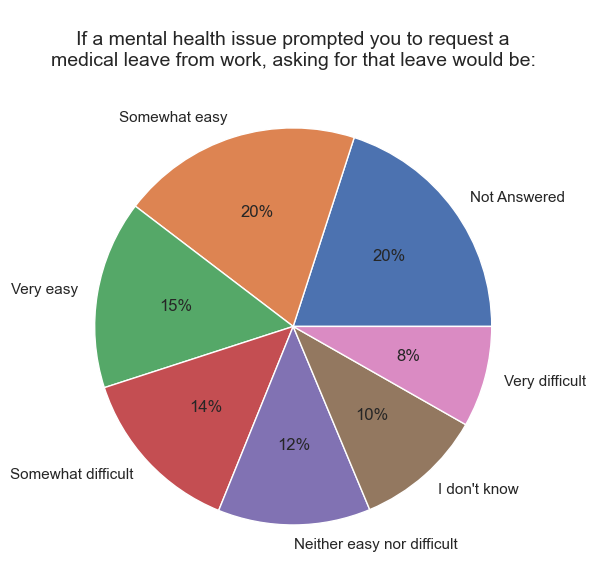

In [43]:
keys = df_employeer_create_safe['CE_Medical_Leave_Request'].value_counts().index.tolist()
values = df_employeer_create_safe['CE_Medical_Leave_Request'].value_counts().tolist()

# Define Seaborn color palette to use 
palette_color = sns.color_palette('deep')

# Setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(6, 6), facecolor='white')
ax.axis('equal')

# Plotting the pie chart
plt.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%')

# Extracting question from the dict using the column names
title = list(filter(lambda x: question_standardized_mapping[x] == df_employeer_create_safe.columns[3], question_standardized_mapping))[0]

# Add a new line character in the middle of the string
new_title = '\n' + ' '.join(title.split()[:len(title.split()) // 2]) + '\n' + ' '.join(title.split()[len(title.split()) // 2:]) + '\n'

# Add a title
ax.set_title(new_title, fontsize=14, y=0.97)

# Setting the grid
ax.grid(True)

plt.tight_layout()

# Save the visual as a .jpeg
plt.savefig("../Visualizations/PieChart_Medical_Leave.jpeg", bbox_inches="tight")

plt.show()

### Safe Environment

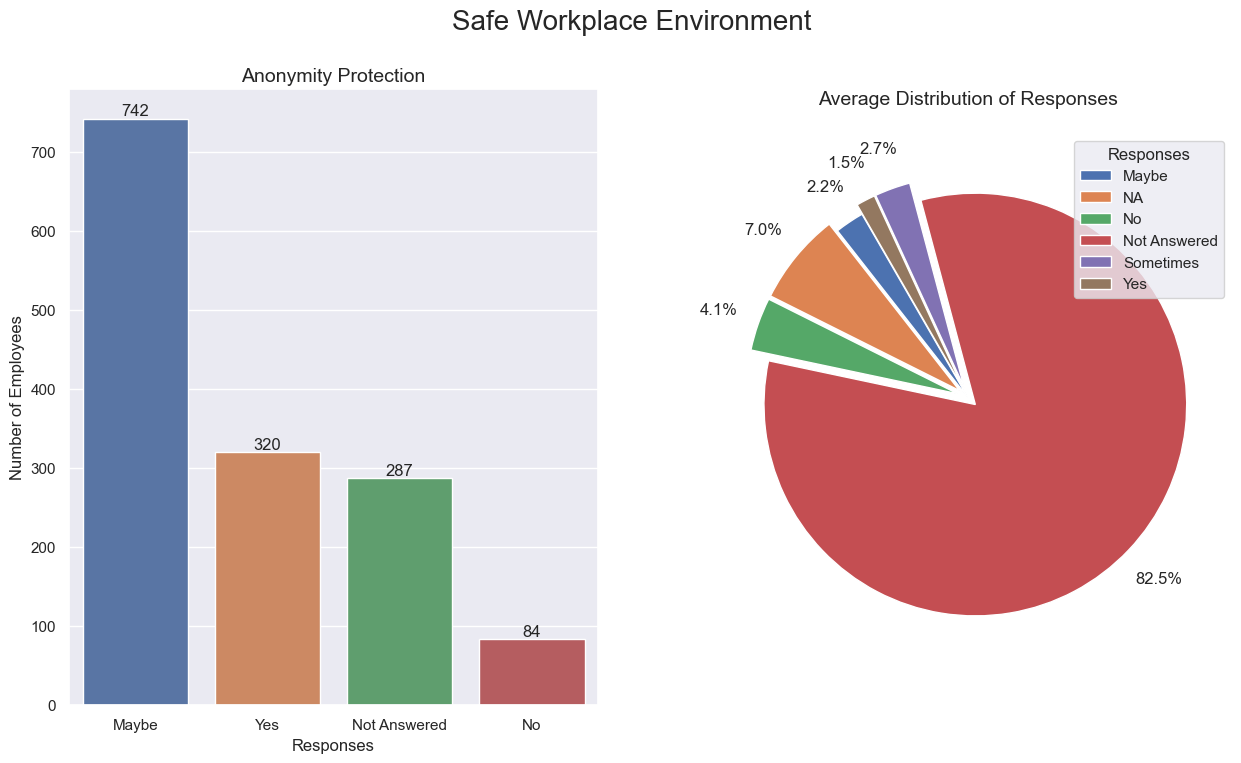

In [44]:
# Create a dataframe for safe environment
df_safe_MH = df_raw[['CE_Anonymity_Protected', 'MH_Reveal_Clients', 'MH_Reveal_Clients_NC', 'MH_Reveal_Coworkers', 'MH_Reveal_Coworkers_NC']].copy()
# To fill the null values
df_safe_MH.fillna('Not Answered', inplace=True)
# Init of a dict to standardize the response values
standardize_values_safe = {"I don't know": 'Maybe',
                           "I'm not sure": 'Maybe',
                           'Sometimes, if it comes up': 'Sometimes',
                           "No, because it doesn't matter": 'NA',
                           'No, because it would impact me negatively': 'No',
                           'Not applicable to me': 'NA',
                           'Yes, always': 'Yes'}
df_safe_MH.replace(standardize_values_safe, inplace=True)

# Create a subplot grid with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 8), facecolor='white')
plt.suptitle('Safe Workplace Environment', fontsize=20)

# Set the "deep" color palette
sns.set_palette("deep")

# Define a custom color palette with different colors for each category
custom_palette = sns.color_palette("deep", len(df_safe_MH['CE_Anonymity_Protected'].unique()))

# First subplot(bar plot)
ax0 = axs[0]

sns.countplot(data=df_safe_MH, x='CE_Anonymity_Protected', ax=ax0, palette=custom_palette)
# Add labels to the individual bars
ax0.bar_label(ax0.containers[0])
ax0.bar_label(ax0.containers[1])
ax0.bar_label(ax0.containers[2])
ax0.bar_label(ax0.containers[3])

# Add a title, x-axis, y-axis
ax0.set_title('Anonymity Protection', fontsize=14)
ax0.set_xlabel("Responses")
ax0.set_ylabel("Number of Employees")

ax1 = axs[1]

# Count the number of each response in all columns
response_counts = df_safe_MH.iloc[:,1:].apply(pd.Series.value_counts).sum(axis=1)

# Elevating the wedges of the pie chart
explode = [0,0.05,0.05,0.05,0.05,0.05]

# Create a pie chart
ax1.pie(response_counts, explode=explode, autopct='%1.1f%%', startangle=120, pctdistance=1.2, labeldistance=1.35)

# Add a title
ax1.set_title("Average Distribution of Responses" + '\n', fontsize=14)

# Add a legend
ax1.legend(response_counts.index, title='Responses', loc='upper right')

# Save the visual as a .jpeg
plt.savefig("../Visualizations/BarPieChart_Work_SafeEnivronment.jpeg", bbox_inches="tight")

plt.show()

### Work position

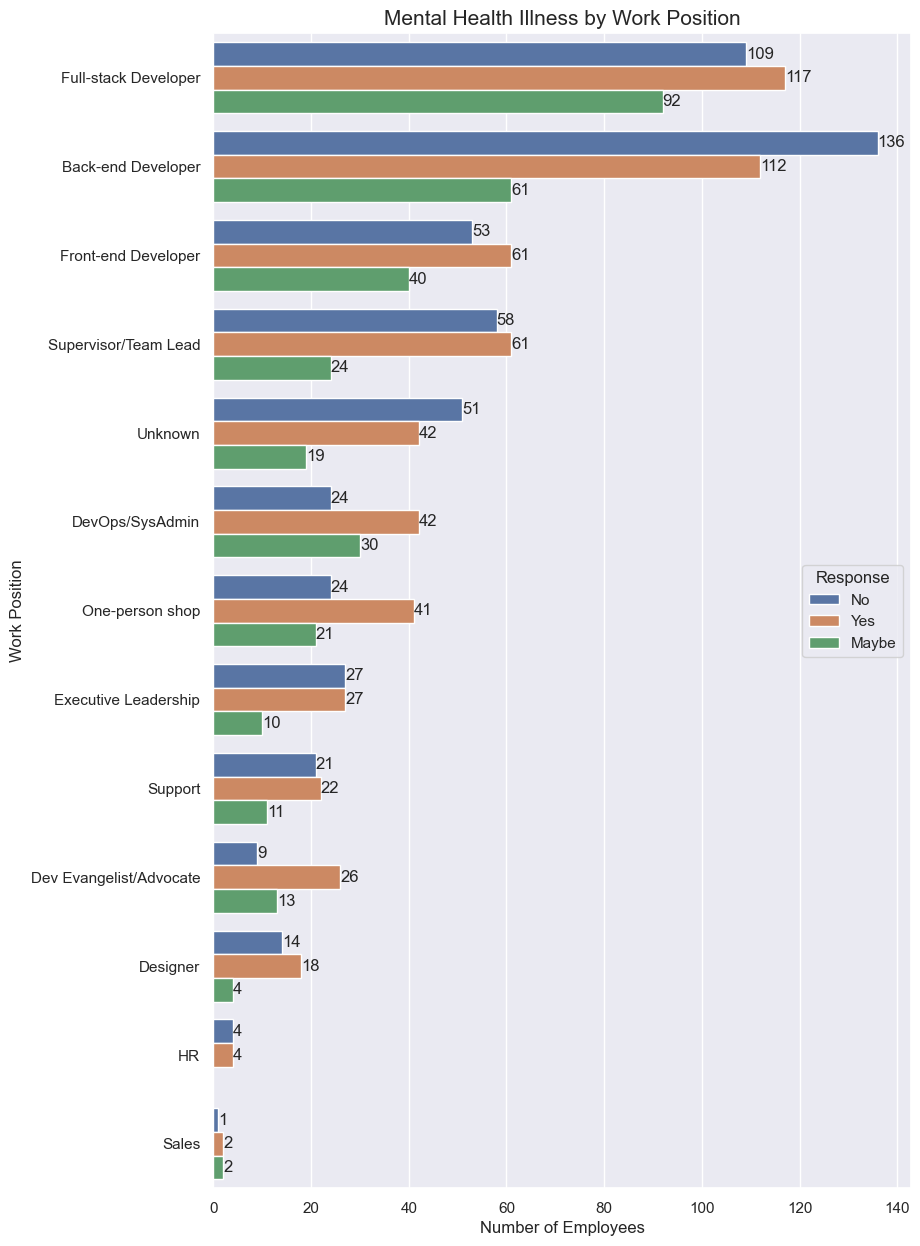

In [45]:
# Setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(9, 15), facecolor='white')

# Create a Seaborn color palette
color_palette = sns.color_palette("deep")

# Create a horizontal bar chart
ax = sns.countplot(data=df_raw, y='Describe_Work_Position', hue='MH_Disorder_Present', 
                   order=['Full-stack Developer', 'Back-end Developer', 'Front-end Developer', 'Supervisor/Team Lead', 'Unknown', 'DevOps/SysAdmin', 'One-person shop',
                          'Executive Leadership', 'Support', 'Dev Evangelist/Advocate', 'Designer', 'HR', 'Sales'])
# Add labels to the individual bars
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

# Adding title, x-axis, y-axis, legend
ax.set_title("Mental Health Illness by Work Position", fontsize=15)
ax.set_xlabel("Number of Employees")
ax.set_ylabel("Work Position")
ax.legend(title='Response', loc='right')

# Save the visual as a .jpeg
plt.savefig("../Visualizations/BarHChart_Work_Position.jpeg", bbox_inches="tight")

plt.show()